In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eye-closed-eeg/MDD/MDD S10 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S28 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S11  EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S15 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S3 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S5 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S13 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S30 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S19 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S7  EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S24  EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S20 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S1 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S14 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S34 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S23 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S32 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S22 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S2  EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S21 EC.png
/kaggle/input/eye-closed-eeg/MDD/MDD S33 

In [2]:
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split


In [3]:
# Path to the main folder
main_folder = '/kaggle/input/eye-closed-eeg'

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalization for pretrained ResNet
])

# Load dataset with ImageFolder
dataset = datasets.ImageFolder(root=main_folder, transform=transform)


In [4]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [5]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # Adjust the last layer for 2 classes


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 157MB/s] 


In [6]:
criterion = nn.CrossEntropyLoss()  # Loss for classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer


In [7]:
def calculate_accuracy(loader, model):
    model.eval()  # Set to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No gradient computation for evaluation
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return correct / total


In [8]:
pip install torch torchvision


Note: you may need to restart the kernel to use updated packages.


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
num_epochs = 6

for epoch in range(num_epochs):
    model.train()  # Set to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Clear gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    # Calculate training and testing accuracy
    train_accuracy = calculate_accuracy(train_loader, model)
    test_accuracy = calculate_accuracy(test_loader, model)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, "
          f"Train Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch [1/6], Loss: 0.0064, Train Accuracy: 82.61%, Test Accuracy: 100.00%
Epoch [2/6], Loss: 0.0050, Train Accuracy: 86.96%, Test Accuracy: 100.00%
Epoch [3/6], Loss: 0.0035, Train Accuracy: 93.48%, Test Accuracy: 100.00%
Epoch [4/6], Loss: 0.0021, Train Accuracy: 93.48%, Test Accuracy: 100.00%
Epoch [5/6], Loss: 0.0106, Train Accuracy: 97.83%, Test Accuracy: 100.00%
Epoch [6/6], Loss: 0.0854, Train Accuracy: 97.83%, Test Accuracy: 91.67%


In [19]:
# Define the path to save the model
model_save_path = '/kaggle/working/ec_eeg_resnet.pth'
# Save the trained model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to /kaggle/working/ec_eeg_resnet.pth


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_predictions_and_labels(loader, model):
    model.eval()  # Set to evaluation mode
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels


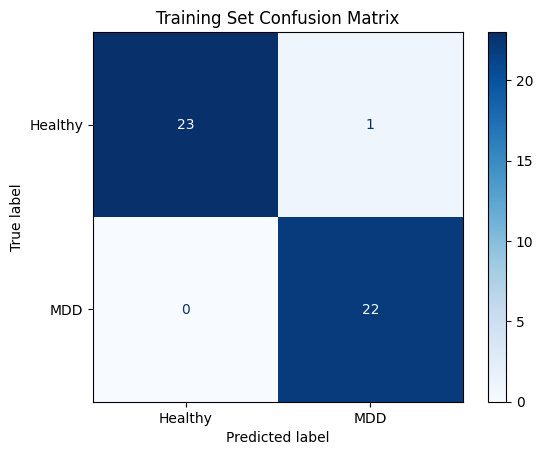

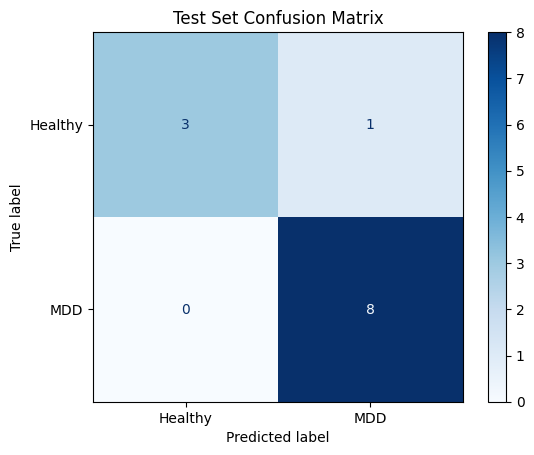

In [18]:
# Get predictions and labels for the training set
train_preds, train_labels = get_predictions_and_labels(train_loader, model)

# Get predictions and labels for the test set
test_preds, test_labels = get_predictions_and_labels(test_loader, model)

# Generate confusion matrix for training set
train_cm = confusion_matrix(train_labels, train_preds)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=['Healthy', 'MDD'])
train_disp.plot(cmap='Blues')
plt.title("Training Set Confusion Matrix")
plt.show()

# Generate confusion matrix for test set
test_cm = confusion_matrix(test_labels, test_preds)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Healthy', 'MDD'])
test_disp.plot(cmap='Blues')
plt.title("Test Set Confusion Matrix")
plt.show()
